<a href="https://colab.research.google.com/github/matiasfeliu92/jupyter_data/blob/master/Linear_regression_with_testing_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [195]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [196]:
np.random.seed(0)
cantidad_personas = 100
edades = np.random.randint(18, 81, cantidad_personas)

# Generar pesos coherentes entre 55 y 90 kg
# Esto puede hacerse suponiendo una relación lineal entre edad y peso
# Se puede ajustar la relación según sea necesario
pesos = np.clip(np.random.normal(0.5 * edades + 50, 5), 55, 90)

# Generar alturas coherentes entre 1.55 y 1.90 metros
# Esto también puede hacerse suponiendo una relación lineal entre edad y altura
# Se puede ajustar la relación según sea necesario
alturas = np.clip(np.random.normal(0.01 * edades + 1.4, 0.05), 1.50, 1.90)
alturas = [round(alt, 2) for alt in alturas]
# Generar géneros
generos = np.random.choice(['Masculino', 'Femenino'], cantidad_personas)

columns_dict = {
    'Age': edades.astype(int),
    'Height_cm': alturas,
    'Weight_kg': pesos.astype(int),
    'Gender': generos
}
df = pd.DataFrame(columns_dict)

In [197]:
print("---------------------------------EDAD-----------------------------------")
print(df.Age.unique())
print("---------------------------------ALTURA-----------------------------------")
print(df.Height_cm.unique())
print("---------------------------------PESO-----------------------------------")
print(df.Weight_kg.unique())
print("---------------------------------GENERO-----------------------------------")
print(df.Gender.unique())

---------------------------------EDAD-----------------------------------
[62 65 71 18 21 77 57 27 37 39 68 54 41 24 42 30 76 19 56 64 35 55 43 31
 26 38 69 34 23 80 33 36 53 67 47 32 50 75 49 28 70 29 73 46 52 58 22 59
 60 74 45]
---------------------------------ALTURA-----------------------------------
[1.9  1.58 1.65 1.63 1.67 1.8  1.76 1.74 1.66 1.82 1.79 1.71 1.56 1.83
 1.87 1.59 1.57 1.69 1.77 1.78 1.53 1.72 1.68 1.84 1.86 1.62 1.7  1.64
 1.88 1.55 1.75 1.89 1.61]
---------------------------------PESO-----------------------------------
[81 80 86 60 55 90 71 76 69 62 74 77 72 70 61 87 57 78 64 68 59 85 65 67
 83 82 79 73 75 84 88 56 63]
---------------------------------GENERO-----------------------------------
['Femenino' 'Masculino']


In [198]:
df.head()

,Age,Height_cm,Weight_kg,Gender
0,62,1.90,81,Femenino
1,65,1.90,80,Masculino
2,71,1.90,86,Masculino
3,18,1.58,60,Femenino
4,21,1.65,55,Masculino


In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        100 non-null    int64  
 1   Height_cm  100 non-null    float64
 2   Weight_kg  100 non-null    int64  
 3   Gender     100 non-null    object 
dtypes: float64(1), int64(2), object(1)
memory usage: 3.2+ KB


In [200]:
df.describe()

,Age,Height_cm,Weight_kg
count,100.000000,100.000000,100.000000
mean,47.240000,1.804200,72.870000
std,18.649949,0.119656,10.234281
min,18.000000,1.530000,55.000000
25%,31.750000,1.710000,64.000000
50%,48.000000,1.885000,73.000000
75%,64.000000,1.900000,81.000000
max,80.000000,1.900000,90.000000


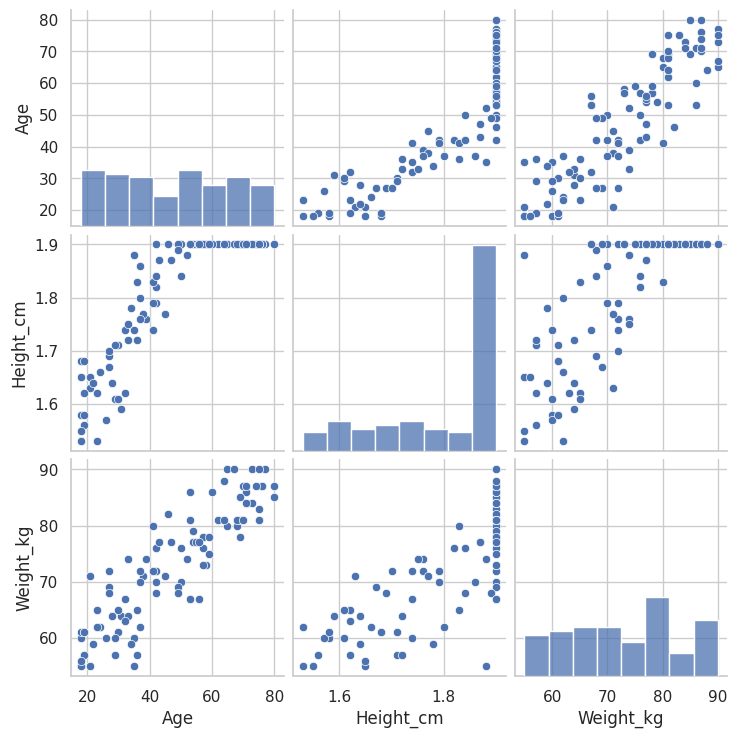

In [201]:
sns.pairplot(df)

In [202]:
def generate_histogram_boxplot(col_):
  col = f'{col_}'
  print(col_)
  fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
  fig.tight_layout(pad=4.0)
  sns.set(style='whitegrid')
  sns.histplot(df[col_], ax=axs[0], kde=True, bins=50, alpha=0.7)
  median_value = df[col_].median()
  mean_value = df[col_].mean()
  mode_value = df[col_].mode().iloc[0]
  axs[0].axvline(median_value, color='r', linestyle='dashed', linewidth=2, label=f'Mediana: {median_value:.2f}')
  axs[0].axvline(mean_value, color='g', linestyle='dashed', linewidth=2, label=f'Media: {mean_value:.2f}')
  axs[0].axvline(mode_value, color='b', linestyle='dashed', linewidth=2, label=f'Moda: {mode_value:.2f}')
  axs[0].set_title(f'Histograma de {col_}')
  axs[0].legend()

  sns.boxplot(x=df[col_], ax=axs[1])
  axs[1].set_title(f'Boxplot de {col_}')
  plt.show()

Age


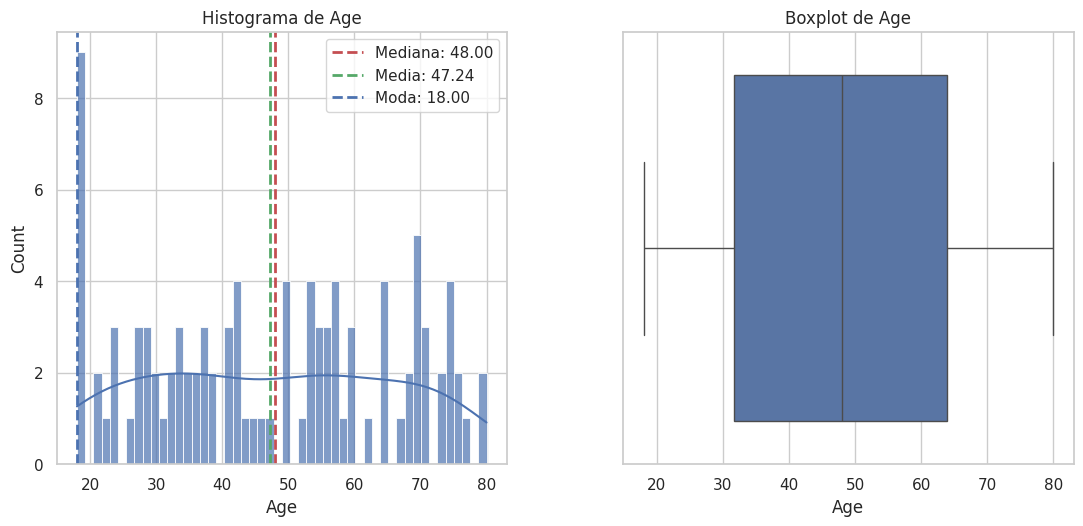

Height_cm


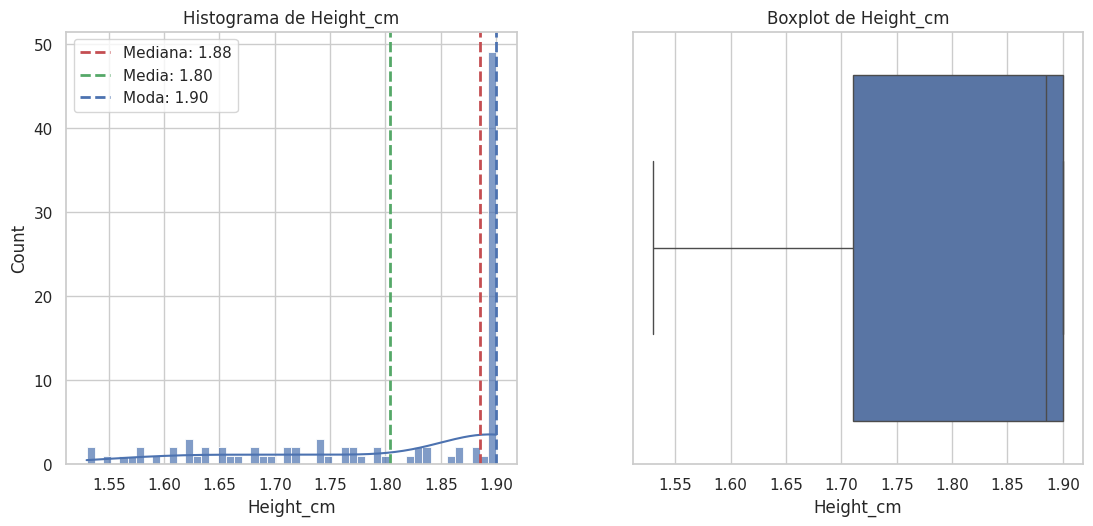

Weight_kg


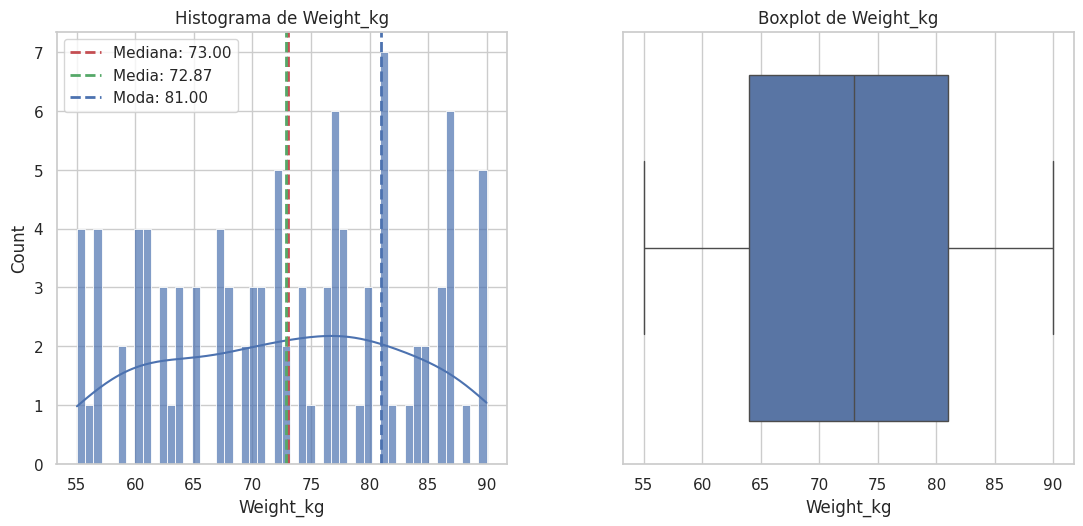

In [203]:
for col in df.select_dtypes(include=['int64', 'float64']).columns:
  generate_histogram_boxplot(col)

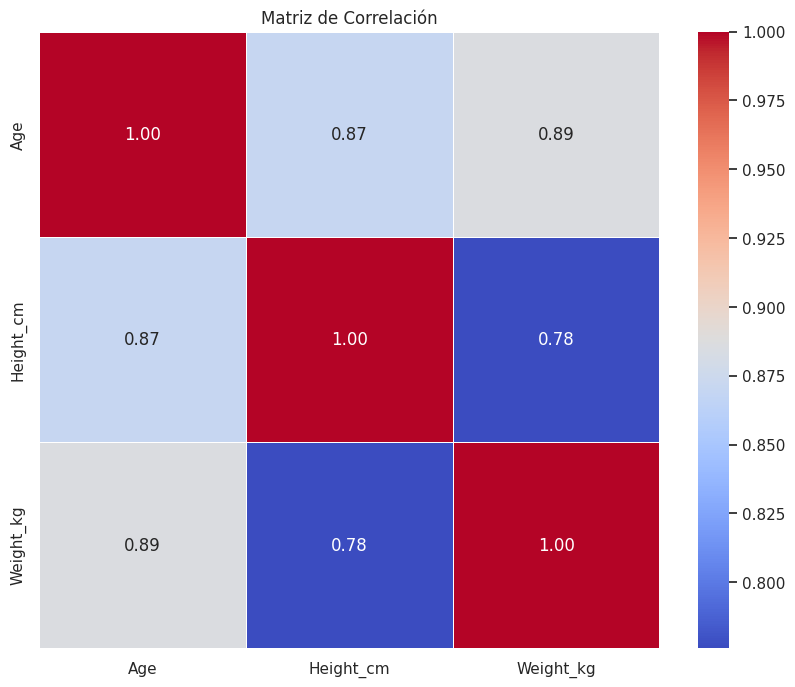

In [204]:
corr_matrix = df.select_dtypes(include=['int64', 'float64']).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

In [205]:
le = LabelEncoder()
le.fit(df['Gender'])
print(le.classes_)
df['Gender'] = le.transform(df['Gender'])

['Femenino' 'Masculino']


In [206]:
scaler = StandardScaler()
data_transformed = scaler.fit_transform(df)
df = pd.DataFrame(data_transformed, columns = df.columns)
df

,Age,Height_cm,Weight_kg,Gender
0,0.795410,0.804663,0.798391,-0.941697
1,0.957079,0.804663,0.700188,1.061913
2,1.280416,0.804663,1.289406,1.061913
3,-1.575731,-1.883146,-1.263874,-0.941697
4,-1.414062,-1.295187,-1.754889,1.061913
...,...,...,...,...
95,-0.821277,-1.547170,-0.969264,-0.941697
96,0.310404,0.804663,0.798391,1.061913
97,1.280416,0.804663,1.093000,-0.941697
98,-0.929056,-1.631164,-0.772858,-0.941697


In [207]:
df.describe()

,Age,Height_cm,Weight_kg,Gender
count,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
mean,-1.088019e-16,-2.455813e-15,-4.329870e-16,-2.886580e-17
std,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00
min,-1.575731e+00,-2.303116e+00,-1.754889e+00,-9.416966e-01
25%,-8.347495e-01,-7.912235e-01,-8.710612e-01,-9.416966e-01
50%,4.095608e-02,6.786715e-01,1.276640e-02,-9.416966e-01
75%,9.031893e-01,8.046625e-01,7.983910e-01,1.061913e+00
max,1.765422e+00,8.046625e-01,1.682219e+00,1.061913e+00


Age


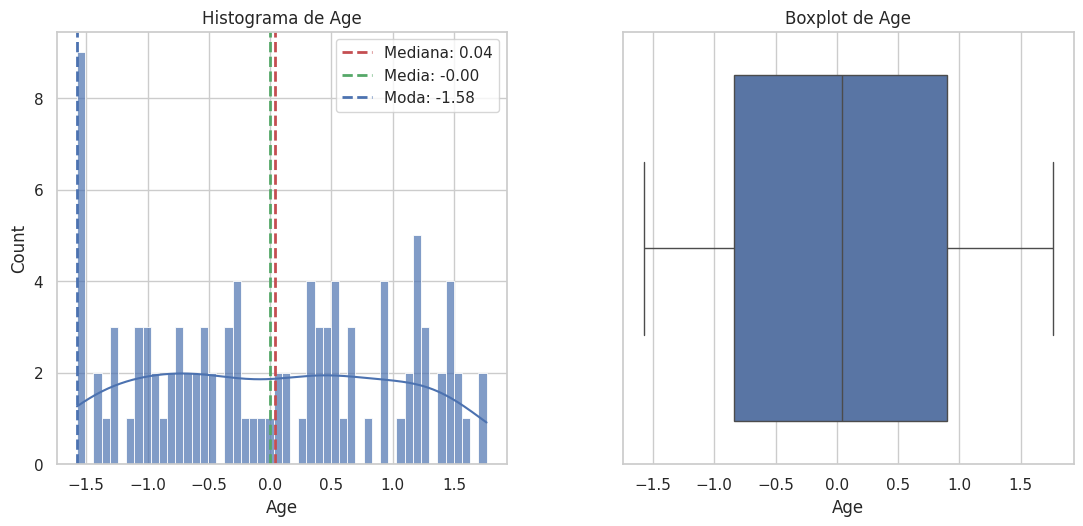

Height_cm


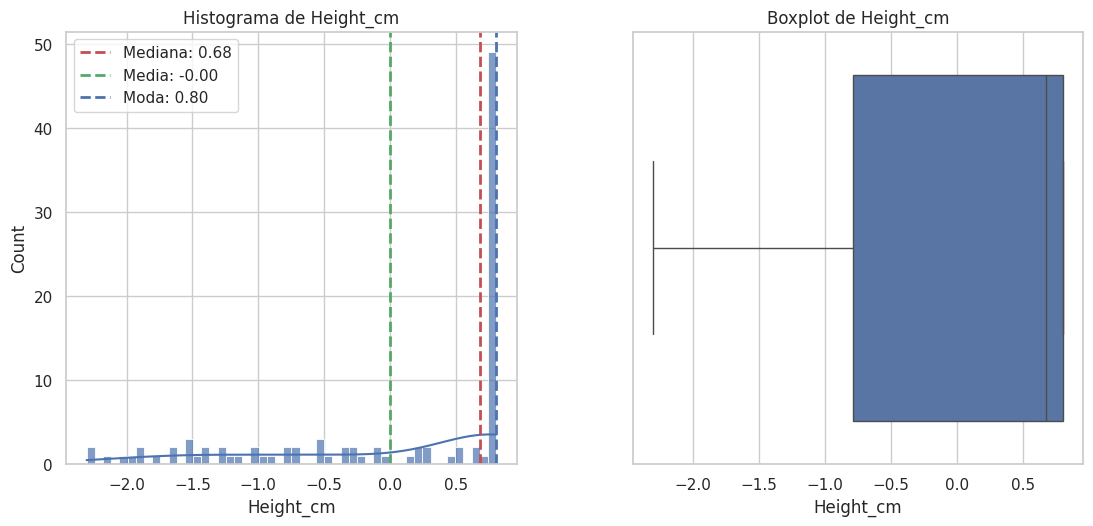

Weight_kg


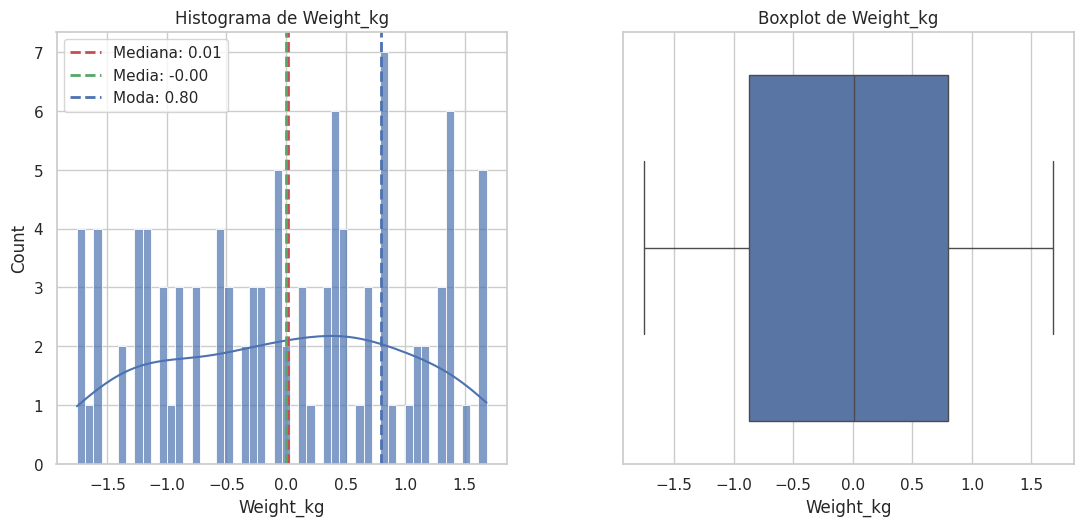

Gender


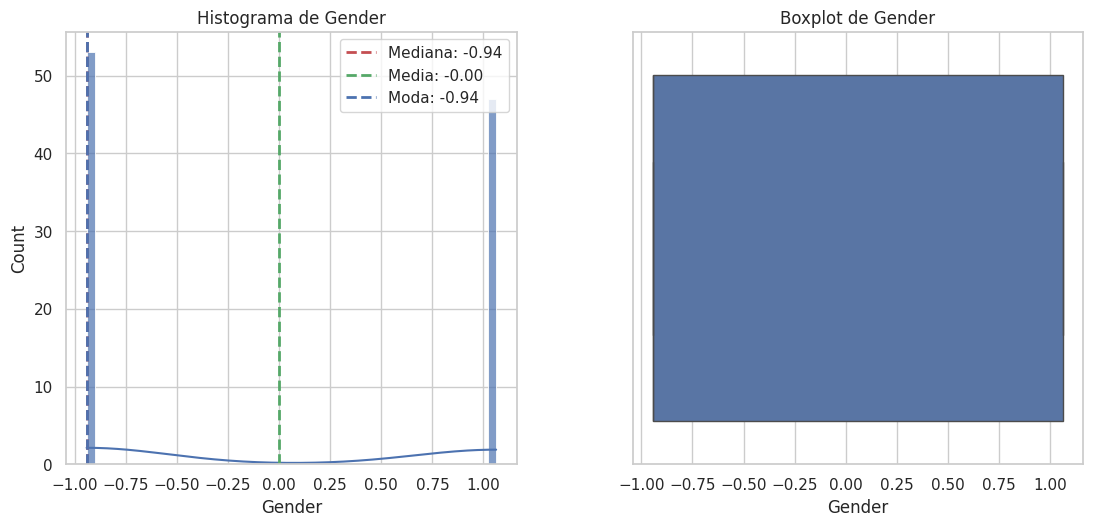

In [208]:
for col in df.select_dtypes(include=['int64', 'float64']).columns:
  generate_histogram_boxplot(col)

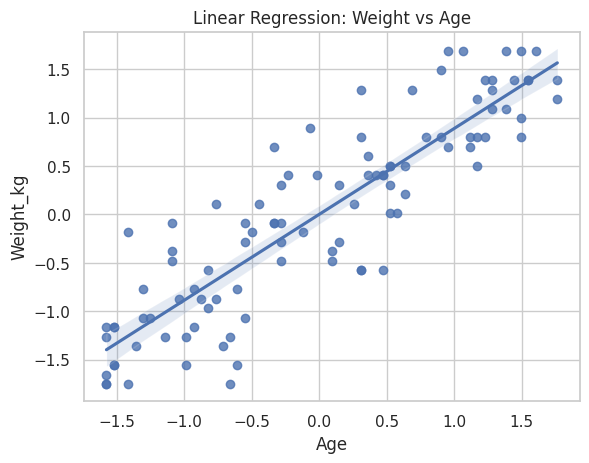

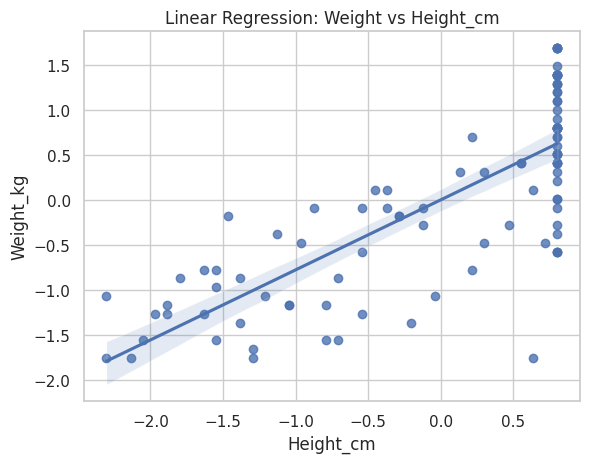

In [209]:
for col in df.select_dtypes(include=['int64', 'float64']).columns:
  if col != 'Gender' and col != 'Weight_kg':
    sns.regplot(x=f'{col}', y='Weight_kg', data=df)
    plt.xlabel(f'{col}')
    plt.ylabel('Weight_kg')
    plt.title(f'Linear Regression: Weight vs {col}')
    plt.show()

In [210]:
X = df.drop('Weight_kg', axis=1)
y = df['Weight_kg']

In [211]:
X.head()

,Age,Height_cm,Gender
0,0.795410,0.804663,-0.941697
1,0.957079,0.804663,1.061913
2,1.280416,0.804663,1.061913
3,-1.575731,-1.883146,-0.941697
4,-1.414062,-1.295187,1.061913


In [212]:
y.head()

0    0.798391
1    0.700188
2    1.289406
3   -1.263874
4   -1.754889
Name: Weight_kg, dtype: float64

In [213]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [214]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (80, 3)
Shape of X_test: (20, 3)
Shape of y_train: (80,)
Shape of y_test: (20,)


In [215]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 0.18486800787659458
R^2 Score: 0.7972067723408689
